In [5]:
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
import math

In [6]:
# Menampilkan Sampel Data Dan Melakukan Drop Column Tertarik
df = pd.read_csv('../Dataset/kendaraan_train_clean.csv')
df.sample(5)

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
71963,0.946297,0.538754,0.045261,0.123410,-0.944378,0.705243,-1.03581,0.784174,0.226844,-0.064713,0
30618,0.946297,0.935243,0.045261,-0.031432,-0.944378,0.705243,1.01588,-0.261372,0.851486,-1.179504,0
281322,-1.113009,-0.915037,0.045261,-0.883061,-0.944378,-1.102610,1.01588,-1.670935,0.908271,0.939824,0
59058,-1.113009,-1.113282,0.045261,-1.812110,-0.944378,-1.102610,1.01588,0.232643,0.908271,1.160332,1
148221,-1.113009,0.000000,0.045261,1.671826,-0.944378,0.705243,-1.03581,-1.670935,0.851486,-0.542481,0


In [7]:
# Mengecek Data Kosong
df.isna().sum()

Jenis_Kelamin        0
Umur                 0
SIM                  0
Kode_Daerah          0
Sudah_Asuransi       0
Umur_Kendaraan       0
Kendaraan_Rusak      0
Premi                0
Kanal_Penjualan      0
Lama_Berlangganan    0
Tertarik             0
dtype: int64

## **Feature Selection**

In [8]:
df = df[['Umur', 'Kanal_Penjualan']]
df.head()

,Umur,Kanal_Penjualan
0,-0.584630,0.756843
1,0.604836,-1.571366
2,-1.179363,0.908271
3,1.265650,0.226844
4,0.736999,-0.454583


In [9]:
# Mengecek Total Data Pada Dataframe
print("Total Data :", len(df))

Total Data : 285662


## **K-MEANS Algorithm**

In [10]:
# Mendefinisikan Metode Euclidean Untuk Perhitungan Jarak Dari Centroid
def euclidean(x, y):
    return math.sqrt(sum((x - y)**2))


def kmeans(k, max_iter, df):
    # Inisialisasi Dictionary Centroid Kemudian Memilih Centroid Secara Random Pada Data 
    # Sesuai Banyaknya Cluster Yang Didefinisikan
    centroid = {i: df[random.randint(0, len(df))] for i in range(k)}
    print(f'Inisialisasi Centroid Random:\n{centroid} \n')

    for i in range(max_iter):
        # Mendefinisikan Dictionary Cluster Dan Mengisi Setiap Key 
        # Pada Cluster Berisi Array kosong, contoh : {0: [], 1: [], 2: []}
        cluster = {i: [] for i in range(k)}

        # Mencari Nilai Terdekat Pada Data Untuk Setiap Centroid Yang Telah Di Definisikan Sebelumnya
        # Menggunakan Metode Euclidean Dan Mencari Nilai Minimum Pada Setiap Distance 
        # Untuk Dimasukkan Kedalam Dictionary Cluster
        for x in df:
            dist = [euclidean(x, centroid[c]) for c in centroid]
            cluster[dist.index(min(dist))].append(x)

        # Mencari Nilai Centroid Ulang Dari Setiap Cluster 
        # Yang Telah Dicari Sebelumnya Menggunakan Mean 
        for cl in cluster:
            centroid[cl] = np.mean(cluster[cl], axis=0)

        print(f'Iterasi Centroid Ke-{i+1}:\n{centroid} \n')

    # Mengembalikan Nilai Dari Variabel Centroid Dan Cluster
    return centroid, cluster


## **Main Program**

In [11]:
# Merubah DataFrame Menjadi Numpy Array
data = df.to_numpy()

# Memasukkan Nilai K dan Maksimum Iterasi
k = 4
max_iter = 100

# Memanggil Fungsi kmeans Yang Akan Mengembalikan Nilai Centroid Dan Cluster
centroid, cluster = kmeans(k, max_iter, data)

Inisialisasi Centroid Random:
{0: array([-0.51854884,  0.75684293]), 1: array([1.0674058 , 0.22684405]), 2: array([ 0.93524292, -1.62815205]), 3: array([-0.9150375 ,  0.75684293])} 

Iterasi Centroid Ke-1:
{0: array([-0.25634331,  0.5551023 ]), 1: array([1.02101003, 0.29067258]), 2: array([ 0.77210138, -1.63874623]), 3: array([-1.01043736,  0.72814236])} 

Iterasi Centroid Ke-2:
{0: array([-0.10913689,  0.47276653]), 1: array([1.16018861, 0.30086984]), 2: array([ 0.77205309, -1.63865968]), 3: array([-0.97970537,  0.73268771])} 

Iterasi Centroid Ke-3:
{0: array([-0.00395537,  0.42389936]), 1: array([1.28197441, 0.30391709]), 2: array([ 0.77149091, -1.63890821]), 3: array([-0.95703194,  0.73355007])} 

Iterasi Centroid Ke-4:
{0: array([0.06939893, 0.40465287]), 1: array([1.39132086, 0.30187615]), 2: array([ 0.77058344, -1.63930945]), 3: array([-0.94526756,  0.73056753])} 

Iterasi Centroid Ke-5:
{0: array([0.11493519, 0.3938153 ]), 1: array([1.44750696, 0.29763948]), 2: array([ 0.768634

## **Hasil Proses Cluster Final**

In [12]:
# Inisialisasi Array Untuk Dat Cluster
df = []

# Melakukan Perulangan Untuk Setiap Key Pada Data
# Hasil Proses K-Means Untuk Diinputkan Kedalam Array Cluster (df)
for key in cluster.keys():
    for c in cluster.get(key):
        df.append((c[0], c[1], key))

# Set Array df menjadi dataframe, Menamakan nama kolom dan menampilkannya
df = pd.DataFrame(df)
df.columns = ['Umur', 'Kanal_Penjualan', 'Cluster']
df.sample(8)

,Umur,Kanal_Penjualan,Cluster
16508,0.000000,0.226844,0
184746,-0.915037,0.756843,3
219936,-0.782875,0.832557,3
465,-0.055979,0.226844,0
181790,-1.179363,0.756843,3
61172,0.076184,0.226844,0
241218,-1.113282,0.908271,3
244707,-0.981119,0.756843,3


In [13]:
# Menampilkan Letak Seluruh Centroids
for i in range(k):
    print(f'Centroid {i+1} :', centroid[i])

Centroid 1 : [0.18030602 0.38177389]
Centroid 2 : [1.55544618 0.29000255]
Centroid 3 : [ 0.76661838 -1.64078949]
Centroid 4 : [-0.92306324  0.72374402]


In [14]:
# Memetakkan Nilai X Dan Y Untuk Setiap Data Pada Dictionary Cluster
clusterize = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in cluster.items()]))

# Membuat Nama Kolom Cluster Berdasarkan Jumlah Cluster Pada Clusterize
col = []
for i in range(len(clusterize.columns)):
    col.append('Cluster ' + str(i + 1))

# Melakukan Set Nama Kolom Dan Menampilkan Sample Data Cluster
clusterize.columns = col
clusterize.sample(8)


,Cluster 1,Cluster 2,Cluster 3,Cluster 4
34130,"[0.4726728136173839, 2.6899061202990245e-16]",NaN,"[0.3405099269706794, -1.6281520482332132]","[-0.6507117228796042, 0.7379143972824711]"
64165,"[-0.1220601762927862, 0.851485586667224]",NaN,"[2.058627453377838, -1.6281520482332132]","[-0.9811189394963654, 0.7379143972824711]"
35858,"[0.3405099269706794, 0.2268440450510833]",NaN,"[0.2083470403239749, -1.6281520482332132]","[-1.11328182614307, 0.7568429288465965]"
65364,NaN,NaN,"[2.4551161133179518, -1.6281520482332132]","[-0.7167931662029564, 2.6899061202990245e-16]"
32214,"[0.7369985869107929, 0.2268440450510833]",NaN,"[0.6709171435874407, -1.6281520482332132]","[-0.9811189394963654, 0.7568429288465965]"
1058,"[0.0, 0.7568429288465965]","[1.3317315768209632, 2.6899061202990245e-16]","[0.3405099269706794, -1.6281520482332132]","[-1.1793632694664222, 0.9082711813596004]"
75868,NaN,NaN,NaN,"[-1.0472003828197176, 0.7568429288465965]"
87598,NaN,NaN,NaN,"[-0.3863859495861952, 0.7568429288465965]"


## **Visualisasi Cluster**

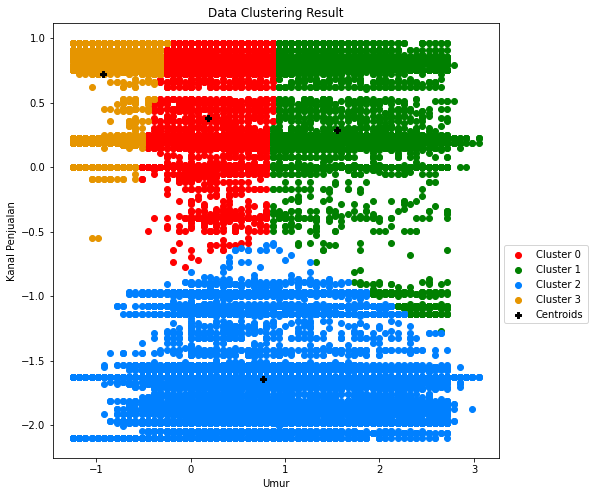

In [15]:
# Set Warna Setiap CLuster
colors = ['r', 'g', '#0080ff', '#e69500', '#e89500']

# Set Ukuran Dan Judul Plot
plt.figure(figsize=(8, 8))
plt.title('Data Clustering Result')

# Melakukan Looping Setiap Titik Data Dan Centroid
for i in range(k):
    plt.scatter(
        df['Umur'][df['Cluster'] == i], 
        df['Kanal_Penjualan'][df['Cluster'] == i],
        color=colors[i],
        label=f'Cluster {i}'
    )

    plt.scatter(centroid[i][0], centroid[i][1], color='k', marker='P')

# Acuan Penampilan Label Centroid
plt.scatter(centroid[0][0], centroid[0][1], color='k', label="Centroids", marker='P')

# Set Nama Label X Dan Y Pada Plot Dan Set Tempat Legend Ditampilkan
plt.xlabel("Umur")
plt.ylabel("Kanal Penjualan")
plt.legend(loc='best', bbox_to_anchor=(1, 0.5))
plt.show()


## **Evaluasi Model**

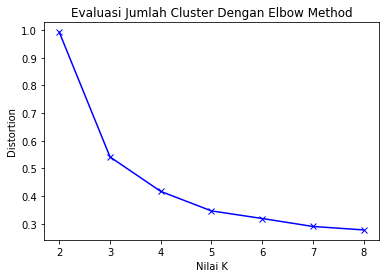

In [16]:
# Inisialisasi Array Untuk Distortion
distortions = []

# Inisialisasi Range K
K = range(2, 9)

# Melakukan Perulangan Untuk Setiap Range
for i in K:
    # Membangun Dan Fit Dataset
    model = KMeans(n_clusters=i).fit(df)
    model.fit(df)

    # Memasukkan Hasil Dari Jumlah cdist data, cluster_center Ke Array
    distortions.append(sum(np.min(cdist(df, model.cluster_centers_, 'euclidean'), axis=1)) / df.shape[0])

# Plot data
plt.plot(K, distortions, 'bx-')
plt.xlabel('Nilai K')
plt.ylabel('Distortion')
plt.title('Evaluasi Jumlah Cluster Dengan Elbow Method')
plt.show()